#### 전통퀀트투자 전략
---
- 정량적 방법론을 기반으로 투자 의사를 결정
    - 평균 회귀
        - 볼린저 밴드 : 현재 주가가 상대적으로 높은지 낮은지 판단할 때 사용하는 지표
        - 듀얼 모멘텀 전략 : 절대 모멘텀 + 상대 모멘텀
    - 이동평균선
    - 상대 강도 지수
    - 스토캐스틱 오실레이터
- 양적 가치 투자 철학
    - 유니버스(종목)확인
    - 아웃라이어 제거
    - 가치 찾기
    - 퀄리티 찾기
    - 신념을 가지고 투자하기

조정 종가

In [2]:
# 평균 회귀 전략

import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# 데이터 수집

df = fdr.DataReader('SPY', '2019') # SPY : S&P를 추종하는 ETF 지수
df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-01-02,250.18,245.98,251.21,245.95,126930000.0,0.0010
2019-01-03,244.21,248.23,248.57,243.67,144140000.0,-0.0239
2019-01-04,252.39,247.59,253.11,247.17,142630000.0,0.0335
2019-01-07,254.38,252.69,255.95,251.69,103140000.0,0.0079
2019-01-08,256.77,256.82,257.31,254.00,102510000.0,0.0094
...,...,...,...,...,...,...
2022-05-03,416.38,415.01,418.93,413.36,100030000.0,0.0046
2022-05-04,429.06,417.06,429.63,413.76,141110000.0,0.0305
2022-05-05,413.81,424.48,424.58,409.46,169850000.0,-0.0355


In [3]:
# 데이터 요약
df.describe()

,Close,Open,High,Low,Volume,Change
count,845.00000,845.000000,845.000000,845.000000,8.450000e+02,845.000000
mean,356.06342,356.021941,358.161314,353.649101,8.460315e+07,0.000650
std,67.12476,67.219933,67.293012,66.956357,4.725757e+07,0.013982
min,222.95000,228.190000,229.680000,218.260000,2.027000e+07,-0.109400
25%,295.87000,295.960000,297.670000,293.960000,5.497000e+07,-0.004300
50%,336.84000,336.610000,338.280000,334.680000,7.244000e+07,0.001300
75%,423.61000,423.670000,426.040000,420.320000,9.746000e+07,0.007200
max,477.71000,479.220000,479.980000,476.060000,3.922200e+08,0.090600


In [4]:
# 데이터 가공
price_df = df.loc[:,['Close']].copy() # 원본은 유지하는 것이 좋다!
price_df.head()

,Close
Date,
2019-01-02,250.18
2019-01-03,244.21
2019-01-04,252.39
2019-01-07,254.38
2019-01-08,256.77


In [5]:
# # 컬럼을 인덱스로
# price_df.set_index(['Date'], inplace=True)
# price_df

In [6]:
# 볼린저 밴드 만들기
price_df['center'] = price_df['Close'].rolling(window=20).mean()
price_df.iloc[18:25]

,Close,center
Date,,
2019-01-29,263.41,NaN
2019-01-30,267.58,259.6130
2019-01-31,269.93,260.6005
2019-02-01,270.06,261.8930
2019-02-04,271.96,262.8715
2019-02-05,273.10,263.8075
2019-02-06,272.74,264.6060


In [7]:
# 상단 밴드, 하단 밴드
price_df['ub'] = price_df['center'] + 2 * price_df['Close'].rolling(window=20).std()
price_df['lb'] = price_df['center'] - 2 * price_df['Close'].rolling(window=20).std()
price_df.iloc[18:25]

,Close,center,ub,lb
Date,,,,
2019-01-29,263.41,NaN,NaN,NaN
2019-01-30,267.58,259.6130,271.369145,247.856855
2019-01-31,269.93,260.6005,272.338328,248.862672
2019-02-01,270.06,261.8930,271.537867,252.248133
2019-02-04,271.96,262.8715,272.427426,253.315574
2019-02-05,273.10,263.8075,273.527196,254.087804
2019-02-06,272.74,264.6060,274.513525,254.698475


In [8]:
price_df

,Close,center,ub,lb
Date,,,,
2019-01-02,250.18,NaN,NaN,NaN
2019-01-03,244.21,NaN,NaN,NaN
2019-01-04,252.39,NaN,NaN,NaN
2019-01-07,254.38,NaN,NaN,NaN
2019-01-08,256.77,NaN,NaN,NaN
...,...,...,...,...
2022-05-03,416.38,433.8785,459.751511,408.005489
2022-05-04,429.06,432.7800,457.423223,408.136777
2022-05-05,413.81,431.1445,456.284932,406.004068


In [9]:
# 볼린저 밴드
n = 20
sigma = 2

def bollinger_band(price_df, n, sigma):
    bb = price_df.copy()
    bb['center'] = price_df['Close'].rolling(n).mean() # 중앙 이동 평균선
    bb['ub'] = bb['center'] + sigma * price_df['Close'].rolling(n).std() # 상단 밴드
    bb['lb'] = bb['center'] - sigma * price_df['Close'].rolling(n).std() # 하단 밴드
    return bb
    
bollinger = bollinger_band(price_df, n, sigma)

In [10]:
base_date = '2019-02-04'
sample = bollinger.loc[base_date:]
sample.head()

,Close,center,ub,lb
Date,,,,
2019-02-04,271.96,262.8715,272.427426,253.315574
2019-02-05,273.10,263.8075,273.527196,254.087804
2019-02-06,272.74,264.6060,274.513525,254.698475
2019-02-07,270.14,265.2145,274.898330,255.530670
2019-02-08,270.47,265.7940,275.266583,256.321417


In [11]:
sample = price_df.loc[base_date:]
sample.head()

,Close,center,ub,lb
Date,,,,
2019-02-04,271.96,262.8715,272.427426,253.315574
2019-02-05,273.10,263.8075,273.527196,254.087804
2019-02-06,272.74,264.6060,274.513525,254.698475
2019-02-07,270.14,265.2145,274.898330,255.530670
2019-02-08,270.47,265.7940,275.266583,256.321417


In [12]:
# 거래 장부
book = sample[['Close']].copy()
book['trade'] = '' # 거래내역 컬럼
book.head()

,Close,trade
Date,,
2019-02-04,271.96,
2019-02-05,273.10,
2019-02-06,272.74,
2019-02-07,270.14,
2019-02-08,270.47,


In [13]:
def create_trade_book(sample):
    book = sample['Close'].copy()
    book['trade'] = ''
    return(book)

In [14]:
# 거래 전략
def tradings(sample, book):
    for i in sample.index:
        if sample.loc[i, 'Close'] > sample.loc[i, 'ub']: # 상단 밴드 이탈 시 동작 안함
            book.loc[i, 'trade'] = ''
        elif sample.loc[i, 'lb'] > sample.loc[i, 'Close']: # 하반 밴드 이탈 시 매수
            if book.shift(1).loc[i, 'trade'] == 'buy': # 이미 매수상태라면
                book.loc[i, 'trade'] = 'buy' # 매수상태 유지
            else:
                book.loc[i,'trade'] = 'buy'
        elif sample.loc[i,'ub'] >= sample.loc[i, 'Close'] and \
            sample.loc[i,'Close'] >= sample.loc[i,'lb']: # 볼린저 밴드 안에 있을 시
            if book.shift(1).loc[i, 'trade'] == 'buy':
                book.loc[i, 'trade'] = 'buy' # 매수상태 유지
            else:
                book.loc[i, 'trade'] = '' # 동작 안 함
    return(book)

<AxesSubplot:xlabel='Date'>

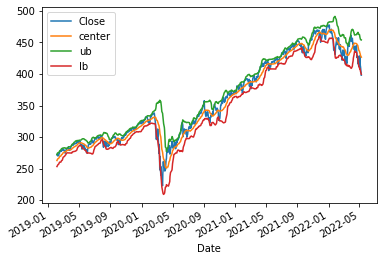

In [15]:
sample.plot()

In [16]:
book = tradings(sample, book)
book

,Close,trade
Date,,
2019-02-04,271.96,
2019-02-05,273.10,
2019-02-06,272.74,
2019-02-07,270.14,
2019-02-08,270.47,
...,...,...
2022-05-03,416.38,buy
2022-05-04,429.06,buy
2022-05-05,413.81,buy


In [17]:
# 전략 수익률
def returns(book):
    # 손익 계산
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0

    for i in book.index:
        # long 진입
        if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':
            buy = book.loc[i, 'Close']
            print('진입일 : ', i, 'long 진입가격 : ', buy)
        # long 청산
        elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':
            sell = book.loc[i, 'Close']
            rtn = (sell - buy) / buy + 1 # 손익 계산
            book.loc[i, 'return'] = rtn
            print('청산일 : ', i, 'long 진입가격 : ', buy, '| long 청산가격 : ', \
                sell, '| return:', round(rtn, 4))
        if book.loc[i, 'trade'] == '': # 제로 포지션
            buy = 0.0
            sell = 0.0
    
    acc_rtn = 1.0
    for i in book.index:
        rtn = book.loc[i, 'return']
        acc_rtn = acc_rtn * rtn # 누적 수익률 계산
        book.loc[i, 'acc return'] = acc_rtn

    print('Accunulated return :', round(acc_rtn, 4))
    return (round(acc_rtn, 4))

In [18]:
print(returns(book))

진입일 :  2019-05-13 00:00:00 long 진입가격 :  280.86
청산일 :  2019-07-03 00:00:00 long 진입가격 :  280.86 | long 청산가격 :  298.8 | return: 1.0639
진입일 :  2019-08-01 00:00:00 long 진입가격 :  294.84
청산일 :  2019-09-05 00:00:00 long 진입가격 :  294.84 | long 청산가격 :  297.82 | return: 1.0101
진입일 :  2019-10-01 00:00:00 long 진입가격 :  293.24
청산일 :  2019-12-12 00:00:00 long 진입가격 :  293.24 | long 청산가격 :  317.13 | return: 1.0815
진입일 :  2020-02-25 00:00:00 long 진입가격 :  312.65
청산일 :  2020-05-27 00:00:00 long 진입가격 :  312.65 | long 청산가격 :  303.53 | return: 0.9708
진입일 :  2020-10-28 00:00:00 long 진입가격 :  326.66
청산일 :  2021-01-07 00:00:00 long 진입가격 :  326.66 | long 청산가격 :  379.1 | return: 1.1605
진입일 :  2021-03-04 00:00:00 long 진입가격 :  376.7
청산일 :  2021-04-05 00:00:00 long 진입가격 :  376.7 | long 청산가격 :  406.36 | return: 1.0787
진입일 :  2021-05-12 00:00:00 long 진입가격 :  405.41
청산일 :  2021-07-02 00:00:00 long 진입가격 :  405.41 | long 청산가격 :  433.72 | return: 1.0698
진입일 :  2021-09-17 00:00:00 long 진입가격 :  441.4
청산일 :  2021-10-19 00:00:00 

<AxesSubplot:xlabel='Date'>

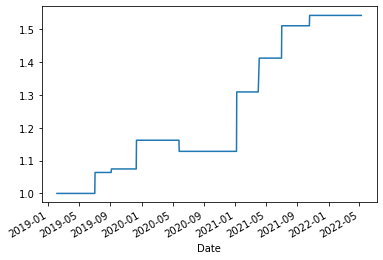

In [19]:
# 변화 추이 (누적 수익률 그래프)
import matplotlib.pylab as plt
book['acc return'].plot()

In [20]:
# 듀얼 모멘텀 전략

# 데이터 수집
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import datetime

read_df = fdr.DataReader('SPY', '1993')
read_df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1993-02-01,44.25,43.97,44.25,43.97,480500.0,0.0071
1993-02-02,44.34,44.22,44.38,44.12,201300.0,0.0020
1993-02-03,44.81,44.41,44.84,44.38,529400.0,0.0106
1993-02-04,45.00,44.97,45.09,44.88,531500.0,0.0042
1993-02-05,44.97,44.97,45.06,44.72,492100.0,-0.0007
...,...,...,...,...,...,...
2022-05-03,416.38,415.01,418.93,413.36,100030000.0,0.0046
2022-05-04,429.06,417.06,429.63,413.76,141110000.0,0.0305
2022-05-05,413.81,424.48,424.58,409.46,169850000.0,-0.0355


In [21]:
price_df = read_df.rename_axis('Date').reset_index()
price_df

,Date,Close,Open,High,Low,Volume,Change
0,1993-02-01,44.25,43.97,44.25,43.97,480500.0,0.0071
1,1993-02-02,44.34,44.22,44.38,44.12,201300.0,0.0020
2,1993-02-03,44.81,44.41,44.84,44.38,529400.0,0.0106
3,1993-02-04,45.00,44.97,45.09,44.88,531500.0,0.0042
4,1993-02-05,44.97,44.97,45.06,44.72,492100.0,-0.0007
...,...,...,...,...,...,...,...
7367,2022-05-03,416.38,415.01,418.93,413.36,100030000.0,0.0046
7368,2022-05-04,429.06,417.06,429.63,413.76,141110000.0,0.0305
7369,2022-05-05,413.81,424.48,424.58,409.46,169850000.0,-0.0355
7370,2022-05-06,411.34,411.18,414.75,405.73,151770000.0,-0.0060


In [22]:
price_df = price_df.loc[:,['Date','Close']].copy() # copy를 의미있게 쓰자ㅋ
price_df.head()

,Date,Close
0,1993-02-01,44.25
1,1993-02-02,44.34
2,1993-02-03,44.81
3,1993-02-04,45.00
4,1993-02-05,44.97


In [23]:
price_df['STD_YM'] =  price_df['Date'].map(lambda x : datetime.datetime.strftime(x, '%Y-%m'))
price_df.head()

,Date,Close,STD_YM
0,1993-02-01,44.25,1993-02
1,1993-02-02,44.34,1993-02
2,1993-02-03,44.81,1993-02
3,1993-02-04,45.00,1993-02
4,1993-02-05,44.97,1993-02


In [24]:
month_list = price_df['STD_YM'].unique()
month_last_df = pd.DataFrame()

for m in month_list:
    # 기준 연월에 맞는 인덱스의 마지막 날짜 row를 데이터프레임에 추가한다
    month_last_df = month_last_df.append(price_df.loc[price_df[price_df['STD_YM'] == m].index[-1],:])

month_last_df.set_index(['Date'], inplace=True)
month_last_df.head()

,Close,STD_YM
Date,,
1993-02-26,44.41,1993-02
1993-03-31,45.19,1993-03
1993-04-30,44.03,1993-04
1993-05-28,45.22,1993-05
1993-06-30,45.06,1993-06


In [25]:
# 데이터 가공
month_last_df['BF_1M_Close'] = month_last_df.shift(1)['Close']
month_last_df['BF_12M_Close'] = month_last_df.shift(12)['Close']
month_last_df.fillna(0, inplace=True)
month_last_df.head(15)

,Close,STD_YM,BF_1M_Close,BF_12M_Close
Date,,,,
1993-02-26,44.41,1993-02,0.00,0.00
1993-03-31,45.19,1993-03,44.41,0.00
1993-04-30,44.03,1993-04,45.19,0.00
1993-05-28,45.22,1993-05,44.03,0.00
1993-06-30,45.06,1993-06,45.22,0.00
1993-07-30,44.84,1993-07,45.06,0.00
1993-08-31,46.56,1993-08,44.84,0.00
1993-09-30,45.94,1993-09,46.56,0.00
1993-10-29,46.84,1993-10,45.94,0.00


In [26]:
# 포지션 기록
book = price_df.copy()
book.set_index(['Date'], inplace=True)
book['trade'] = ''
book.head()

,Close,STD_YM,trade
Date,,,
1993-02-01,44.25,1993-02,
1993-02-02,44.34,1993-02,
1993-02-03,44.81,1993-02,
1993-02-04,45.00,1993-02,
1993-02-05,44.97,1993-02,


In [27]:
# 거래실행

# trading 부분
ticker = 'SPY'
for x in month_last_df.index:
    signal = ''
    # 절대 모멘텀을 계산
    momentum_index = month_last_df.loc[x, 'BF_1M_Close'] / month_last_df.loc[x, 'BF_12M_Close'] - 1
    # 절대 모멘텀 지표 True / False를 판단
    flag = True if ((momentum_index > 0.0) and (momentum_index != np.inf) and momentum_index != -np.inf)\
        else False\
        and True # 추가로 다른 조건을 넣을 수 있다는 것을 표시
    if flag:
        signal = 'buy ' + ticker # 절대 모멘텀 지표가 Positive이면 매수 후 보유
    print('날짜 : ', x, '모멘텀 인덱스 : ', momentum_index, 'flag : ', flag, 'signal : ', signal)
    book.loc[x:, 'trade'] = signal

/var/folders/8b/f3d6s4_571bds9t_ch39vmn00000gn/T/ipykernel_2102/4049747133.py:8: RuntimeWarning: invalid value encountered in double_scalars
  momentum_index = month_last_df.loc[x, 'BF_1M_Close'] / month_last_df.loc[x, 'BF_12M_Close'] - 1
/var/folders/8b/f3d6s4_571bds9t_ch39vmn00000gn/T/ipykernel_2102/4049747133.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  momentum_index = month_last_df.loc[x, 'BF_1M_Close'] / month_last_df.loc[x, 'BF_12M_Close'] - 1


날짜 :  1993-02-26 00:00:00 모멘텀 인덱스 :  nan flag :  False signal :  
날짜 :  1993-03-31 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-04-30 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-05-28 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-06-30 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-07-30 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-08-31 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-09-30 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-10-29 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-11-30 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-12-31 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1994-01-31 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1994-02-28 00:00:00 모멘텀 인덱스 :  0.0857914884035127 flag :  True signal :  buy SPY
날짜 :  1994-03-31 00:00:00 모멘텀 인덱스 :  0.03584863907944236 flag :  True signal :  buy SPY
날짜 :  1994-04-29 00:00:00 모멘텀 인덱스

In [28]:
def returns(book, ticker):
    # 손익 계산
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        if book.loc[i, 'trade'] == 'buy ' + ticker and book.shift(1).loc[i, 'trade'] == '':
            # long 진입
            buy = book.loc[i, 'Close']
            print('진입일 : ', i, 'long 진입가격 : ', buy)

        elif book.loc[i, 'trade'] == 'buy ' + ticker and book.shift(1).loc[i, 'trade'] == 'buy ' + ticker:
            # 보유중
            current = book.loc[i, 'Close']
            rtn = (current - buy) / buy + 1
            book.loc[i, 'return'] = rtn
        
        elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy ' + ticker:
            # long 청산
            sell = book.loc[i, 'Close']
            rtn = (sell - buy) / buy + 1 # 손익 계산
            book.loc[i, 'return'] = rtn
            print('청산일 : ', i, 'long 진입가격 : ', buy, ' | long 청산가격 : ',\
                sell, ' | return : ', round(rtn, 4))

        if book.loc[i, 'trade'] == '': # 제로 포지션
            buy = 0.0
            sell = 0.0
            current = 0.0

    acc_rtn = 1.0
    for i in book.index:
        if book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy ' + ticker:
        # long 청산 시
            rtn = book.loc[i, 'return']
            acc_rtn = acc_rtn * rtn # 누적 수익률 계산
            book.loc[i:, 'acc return'] = acc_rtn

    print('Accunulated return : ', round(acc_rtn, 4))
    return(round(acc_rtn, 4))



In [29]:
returns(book, ticker)

진입일 :  1994-02-28 00:00:00 long 진입가격 :  46.81
청산일 :  1994-05-31 00:00:00 long 진입가격 :  46.81  | long 청산가격 :  45.81  | return :  0.9786
진입일 :  1994-06-30 00:00:00 long 진입가격 :  44.47
청산일 :  1994-07-29 00:00:00 long 진입가격 :  44.47  | long 청산가격 :  45.91  | return :  1.0324
진입일 :  1994-09-30 00:00:00 long 진입가격 :  46.17
청산일 :  1994-10-31 00:00:00 long 진입가격 :  46.17  | long 청산가격 :  47.48  | return :  1.0284
진입일 :  1994-11-30 00:00:00 long 진입가격 :  45.59
청산일 :  1994-12-30 00:00:00 long 진입가격 :  45.59  | long 청산가격 :  45.56  | return :  0.9993
진입일 :  1995-02-28 00:00:00 long 진입가격 :  49.02
청산일 :  2000-12-29 00:00:00 long 진입가격 :  49.02  | long 청산가격 :  131.19  | return :  2.6763
진입일 :  2003-07-31 00:00:00 long 진입가격 :  99.39
청산일 :  2008-02-29 00:00:00 long 진입가격 :  99.39  | long 청산가격 :  133.82  | return :  1.3464
진입일 :  2009-10-30 00:00:00 long 진입가격 :  103.56
청산일 :  2010-09-30 00:00:00 long 진입가격 :  103.56  | long 청산가격 :  114.13  | return :  1.1021
진입일 :  2010-10-29 00:00:00 long 진입가격 :  118.49
청산일 :  201

10.2787

In [30]:
# 모멘텀 전체 스크립트

# 데이터 수집
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import datetime

read_df = fdr.DataReader('SPY', '1993')

price_df = read_df.rename_axis('Date').reset_index()

price_df = price_df.loc[:,['Date','Close']].copy()

price_df['STD_YM'] =  price_df['Date'].map(lambda x : datetime.datetime.strftime(x, '%Y-%m'))

month_list = price_df['STD_YM'].unique()
month_last_df = pd.DataFrame()

for m in month_list:
    # 기준 연월에 맞는 인덱스의 마지막 날짜 row를 데이터프레임에 추가한다
    month_last_df = month_last_df.append(price_df.loc[price_df[price_df['STD_YM'] == m].index[-1],:])

month_last_df.set_index(['Date'], inplace=True)

month_last_df['BF_1M_Close'] = month_last_df.shift(1)['Close']
month_last_df['BF_12M_Close'] = month_last_df.shift(12)['Close']
month_last_df.fillna(0, inplace=True)

book = price_df.copy()
book.set_index(['Date'], inplace=True)
book['trade'] = ''
ticker = 'SPY'
for x in month_last_df.index:
    signal = ''
    # 절대 모멘텀을 계산
    momentum_index = month_last_df.loc[x, 'BF_1M_Close'] / month_last_df.loc[x, 'BF_12M_Close'] - 1
    # 절대 모멘텀 지표 True / False를 판단
    flag = True if ((momentum_index > 0.0) and (momentum_index != np.inf) and momentum_index != -np.inf)\
        else False\
        and True # 추가로 다른 조건을 넣을 수 있다는 것을 표시
    if flag:
        signal = 'buy ' + ticker # 절대 모멘텀 지표가 Positive이면 매수 후 보유
    print('날짜 : ', x, '모멘텀 인덱스 : ', momentum_index, 'flag : ', flag, 'signal : ', signal)
    book.loc[x:, 'trade'] = signal

returns(book, ticker)


/var/folders/8b/f3d6s4_571bds9t_ch39vmn00000gn/T/ipykernel_2102/1737609614.py:37: RuntimeWarning: invalid value encountered in double_scalars
  momentum_index = month_last_df.loc[x, 'BF_1M_Close'] / month_last_df.loc[x, 'BF_12M_Close'] - 1
/var/folders/8b/f3d6s4_571bds9t_ch39vmn00000gn/T/ipykernel_2102/1737609614.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  momentum_index = month_last_df.loc[x, 'BF_1M_Close'] / month_last_df.loc[x, 'BF_12M_Close'] - 1


날짜 :  1993-02-26 00:00:00 모멘텀 인덱스 :  nan flag :  False signal :  
날짜 :  1993-03-31 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-04-30 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-05-28 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-06-30 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-07-30 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-08-31 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-09-30 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-10-29 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-11-30 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-12-31 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1994-01-31 00:00:00 모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1994-02-28 00:00:00 모멘텀 인덱스 :  0.0857914884035127 flag :  True signal :  buy SPY
날짜 :  1994-03-31 00:00:00 모멘텀 인덱스 :  0.03584863907944236 flag :  True signal :  buy SPY
날짜 :  1994-04-29 00:00:00 모멘텀 인덱스

10.2787

In [31]:
# 상대 모멘텀 전략 / 전처리 함수

def data_preprocessing(sample, ticker, base_date):
    sample['CODE'] = ticker # 종목 코드 추가
    sample = sample[sample['Date'] >= base_date][['Date', 'CODE', 'Close']].copy()
    # 기준일자 이후 데이터 사용
    sample.reset_index(inplace= True, drop= True)
    sample['STD_YM'] = sample['Date'].map\
        (lambda x : datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%Y-%m')) # 기준 연월
    sample['1M_RET'] = 0.0 # 수익률 컬럼
    ym_keys = list(sample['STD_YM'].unique())
    return sample, ym_keys

In [32]:
# 상대 모멘텀 전략

import os
import glob
import pandas as pd
import numpy as np
import datetime

# 데이터

# csv 파일로 저장
# files = fdr.DataReader('AMZN', '1993')
# files.to_csv('./csv_/AMZN.csv')

# 종목 데이터 읽기
files = glob.glob('./csv_/*.csv')
print(files)

# 필요한 데이터 프레임 생성
# Monthly 데이터 저장
month_last_df = pd.DataFrame(columns=['Date', 'CODE', '1M_RET'])

# 종목 데이터 프레임 생성
stock_df = pd.DataFrame(columns=['Date', 'CODE', 'Close'])

for file in files:
    # 데이터 저장 경로에 있는 개별 종목들을 읽어온다.
    if os.path.isdir(file):
        print('%s <DIR>' %file)
    else:
        folder, name = os.path.split(file)
        head, tail = os.path.splitext(name)
        print(file)
        read_df = pd.read_csv(file) # 경로를 읽은 데이터를 하나씩 읽어들인다.
        
        # 1단계 : 데이터 가공
        price_df, ym_keys = data_preprocessing(read_df, head, base_date='2010-01-02')
        # 가공한 데이터 붙이기
        stock_df = stock_df.append(price_df.loc[:,['Date', 'CODE', 'Close']],sort=False)
        # 월별 상대 모멘텀 계산을 위한 1개월간 수익률 계산
        for ym in ym_keys:
            m_ret = price_df.loc[price_df[price_df['STD_YM'] == ym].index[-1], 'Close'] \
                / price_df.loc[price_df[price_df['STD_YM'] == ym].index[0], 'Close']
            price_df.loc[price_df['STD_YM'] == ym, ['1M_RET']] = m_ret
            month_last_df = month_last_df.append(price_df.loc[price_df[price_df['STD_YM'] == ym].index[-1],\
                ['Date', 'CODE', '1M_RET']])

['./csv_/AMZN.csv', './csv_/SPY.csv', './csv_/AAPL.csv']
./csv_/AMZN.csv
./csv_/SPY.csv
./csv_/AAPL.csv


In [33]:
# 2단계 : 상대 모멘텀 수익률로 필터링
month_ret_df = month_last_df.pivot('Date', 'CODE', '1M_RET').copy()

# 투자종목 선택할 rank
month_ret_df = month_ret_df.rank(axis=1, ascending=False, method='max', pct=True)
# 상위 40%에 드는 종목들만 신호 목록
month_ret_df = month_ret_df.where(month_ret_df < 0.4, np.nan)
month_ret_df.fillna(0, inplace=True)
month_ret_df[month_ret_df != 0] = 1
stock_codes = list(stock_df['CODE'].unique())

In [34]:
# 포지션 함수
def create_trade_book(sample, sample_codes):
    book = pd.DataFrame()
    book = sample[sample_codes].copy()
    book['STD_YM'] = book.index.map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
    # book['trade'] =''
    for c in sample_codes:
        book['p ' + c] = ''
        book['r ' + c] = ''
    return book

In [35]:
# 거래 실행
def tradings(book, s_codes):
    std_ym =''
    buy_phase = False
    for s in s_codes:
        print(s)
        for i in book.index:
            if book.loc[i, 'p ' + s] == '' and book.shift(1).loc[i, 'p ' + s] == 'ready ' + s:
                std_ym = book.loc[i, 'STD_YM']
                buy_phase = True
            if book.loc[i, 'p ' + s] == '' and book.loc[i, 'STD_YM'] == std_ym and buy_phase == True:
                book.loc[i, 'p ' + s] = 'buy ' + s
            if book.loc[i, 'p ' + s]:
                std_ym = None
                buy_phase =False
    return book
                

In [36]:
# 전략 수익률
def multi_returns(book, s_codes):
    # 손익 계산
    rtn = 1.0
    buy_dict = {}
    num = len(s_codes)
    sell_dict = {}

    for i in book.index:
        for s in s_codes:
            if book.loc[i, 'p ' + s] == 'buy ' + s and\
            book.shift(1).loc[i, 'p ' + s] == 'ready ' +s and\
            book.shift(2).loc[i, 'p ' + s] == '' : # long 진입
                buy_dict[s] = book.loc[i, s]
            elif book.loc[i, 'p ' + s] == '' and book.shift(1).loc[i, 'p ' + s] == 'buy ' + s:
                sell_dict[s] = book.loc[i, s] # long 청산
                # 손익 계산
                rtn = (sell_dict[s] / buy_dict[s]) - 1
                book.loc[i, 'r ' + s] = rtn
                print('개별 청산일 : ', i, '종목 코드 : ', s, 'long 진입가격 : ', buy_dict[s],\
                '| long 청산가격 : ', sell_dict[s], '| return :', round(rtn*100, 2), '%') # 수익률 계산
            if book.loc[i, 'p ' + s] == '': # 제로 포지션 || 청산
                buy_dict[s] = 0.0
                sell_dict[s] = 0.0
    
    acc_rtn = 1.0
    for i in book.index:
        rtn = 0.0
        count = 0
        for s in s_codes:
            if book.loc[i,'p ' + s] == '' and book.shift(1).loc[i, 'p ' + s] == 'buy ' + s:
            # 수익률이 나오므로 청산
                count += 1
                rtn += book.loc[i, 'r ' + s]
        if(rtn != 0.0) & (count != 0):
            acc_rtn *= (rtn/count) + 1
            print('누적 청산일 : ', i, '청산 종목수 : ', count,\
                '청산 수익률 : ', round((rtn/count),4), '누적 수익률 : ', round(acc_rtn, 4))
        
        # 수익률 계산
        book.loc[i, 'acc_rtn'] = acc_rtn
    
    print('누적 수익률 : ', round(acc_rtn,4))


In [37]:
# 포지션 처리

# 3단계 : 신호 목록으로 트레이딩 + 포지셔닝
sig_dict = dict()

for date in month_ret_df.index:
    # 신호가 포착된 종목 코드만 읽어오기
    ticker_list = list(month_ret_df.loc[date, month_ret_df.loc[date,:] >= 1.0].index)
    # 날짜별 종목 코드 저장
    sig_dict[date] = ticker_list
stock_c_matrix = stock_df.pivot('Date', 'CODE', 'Close').copy()
book = create_trade_book(stock_c_matrix, list(stock_df['CODE'].unique()))

# 포지셔닝
for date, values in sig_dict.items():
    for stock in values:
        book.loc[date, 'p ' + stock] = 'ready ' + stock

# 3-2 트레이딩
book = tradings(book, stock_codes)

# 4단계 : 수익률 계산
multi_returns(book, stock_codes)

AMZN
SPY
AAPL
개별 청산일 :  2010-02-02 종목 코드 :  SPY long 진입가격 :  109.06 | long 청산가격 :  110.38 | return : 1.21 %
개별 청산일 :  2010-03-02 종목 코드 :  AAPL long 진입가격 :  7.46 | long 청산가격 :  7.46 | return : 0.0 %
개별 청산일 :  2010-04-05 종목 코드 :  AAPL long 진입가격 :  8.43 | long 청산가격 :  8.52 | return : 1.07 %
개별 청산일 :  2010-05-04 종목 코드 :  AAPL long 진입가격 :  9.51 | long 청산가격 :  9.24 | return : -2.84 %
개별 청산일 :  2010-06-02 종목 코드 :  AAPL long 진입가격 :  9.32 | long 청산가격 :  9.43 | return : 1.18 %
개별 청산일 :  2010-07-02 종목 코드 :  AAPL long 진입가격 :  8.87 | long 청산가격 :  8.82 | return : -0.56 %
개별 청산일 :  2010-08-03 종목 코드 :  SPY long 진입가격 :  112.76 | long 청산가격 :  112.22 | return : -0.48 %
개별 청산일 :  2010-09-02 종목 코드 :  AMZN long 진입가격 :  132.49 | long 청산가격 :  135.21 | return : 2.05 %
개별 청산일 :  2010-10-04 종목 코드 :  AMZN long 진입가격 :  153.71 | long 청산가격 :  155.39 | return : 1.09 %
개별 청산일 :  2010-11-02 종목 코드 :  AMZN long 진입가격 :  162.58 | long 청산가격 :  164.61 | return : 1.25 %
개별 청산일 :  2010-12-02 종목 코드 :  AMZN long 진입가격 :  176.55 |

In [41]:
# 가치투자 퀀트 전략

# 데이터 수집
import FinanceDataReader as fdr
krx_df = fdr.StockListing('KRX')
krx_df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,095570,KOSPI,AJ네트웍스,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,006840,KOSPI,AK홀딩스,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,054620,KOSDAQ,APS홀딩스,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,265520,KOSDAQ,AP시스템,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np

